<a href="https://colab.research.google.com/github/Cehiim/TeoriaDosGrafos/blob/main/Projeto/testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informações gerais

## Tema
* Aplicação com busca semântica para representação de grafos.

## Integrantes
* Cesar Hideki Imai - 10402758.
* João Victor Dallapé Madeira - 10400725.
* David Varão Lima Bentes Pessoa - 10402647.

# Setup

## Integração dos pacotes

O pacote `vectordb2` é usado para armazenar e recuperar textos usando técnicas de *chunking* (segmentação de texto), *embedding* (conversão de texto para vetores numéricos) e busca vetorial.

[Referência](https://vectordb.com/)

In [42]:
%pip install vectordb2

O pacote `requests` é ser usado para recuperar o arquivo por meio de requisição em HTTP.

In [43]:
%pip install requests

O pacote `network pyvis` é usado para criar uma visualização interativa de grafos.

[Referência](https://pyvis.readthedocs.io/en/latest/documentation.html)

In [44]:
%pip install networkx pyvis

Importação das bibliotecas

In [45]:
from vectordb import Memory
import requests
from pyvis.network import Network
import matplotlib.pyplot as plt # Será usado para apresentação visual do grafo
import os # Será usado métodos para limpar o terminal para atualizar a interface em cada iteração do sistema
import time # Será usado método de espera para atualizar a interface gradualmente

## Classe Grafo

In [46]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 13 13:59:10 2023

@author: icalc
"""
class Grafo:
    TAM_MAX_DEFAULT = 100 # qtde de vértices máxima default
    # construtor da classe grafo
    def __init__(self, n=TAM_MAX_DEFAULT):
        self.n = n # número de vértices
        self.m = 0 # número de arestas
        # matriz de adjacência
        self.adj = [[0 for i in range(n)] for j in range(n)]

	# Insere uma aresta no Grafo tal que
	# v é adjacente a w
    def insereA(self, v, w):
        if self.adj[v][w] == 0:
            self.adj[v][w] = 1
            self.m+=1 # atualiza qtd arestas

# remove uma aresta v->w do Grafo
    def removeA(self, v, w):
        if(v == w):
            return
        # testa se temos a aresta
        if self.adj[v][w] == 1:
            self.adj[v][w] = 0
            self.m -= 1  # atualiza qtd arestas

	# Apresenta o Grafo contendo
	# número de vértices, arestas
	# e a matriz de adjacência obtida
    def show(self):
        print(f"\n n: {self.n:2d} ", end="")
        print(f"m: {self.m:2d}\n")
        for i in range(self.n):
            for w in range(self.n):
                if self.adj[i][w] == 1:
                    print(f"Adj[{i:2d},{w:2d}] = 1 ", end="")
                else:
                    print(f"Adj[{i:2d},{w:2d}] = 0 ", end="")
            print("\n")
        print("\nfim da impressao do grafo." )


	# Apresenta o Grafo contendo
	# número de vértices, arestas
	# e a matriz de adjacência obtida
    # Apresentando apenas os valores 0 ou 1
    def showMin(self):
        print(f"\n n: {self.n:2d} ", end="")
        print(f"m: {self.m:2d}\n")
        for i in range(self.n):
            for w in range(self.n):
                if self.adj[i][w] == 1:
                    print(" 1 ", end="")
                else:
                    print(" 0 ", end="")
            print("\n")
        print("\nfim da impressao do grafo." )

    def dfs(self, visitados, vertice): # Depth First Search
        visitados[vertice] = True
        for i in range(self.n):
            if(self.adj[vertice][i] != 0 and visitados[i] == False): # Caso haja acesso para um próximo vértice que não foi visitado
                self.dfs(visitados, i)

    def ehForte(self):
        count = 0
        for i in range(self.n):
            visitados = [False] * self.n
            self.dfs(visitados, i)
            if(all(visitados)): # Caso todos tenham sido visitados
                count += 1
        if(count == self.n):
            return True
        else:
            return False

    def ehSemiForte(self):
        for i in range(self.n):
            for j in range(self.n):
                visitados = [False] * self.n
                self.dfs(visitados, j)
                if(visitados[i] == False): # Verifica se o vértice 'j' tem acesso para o vértice 'i'
                    visitados = [False] * self.n
                    self.dfs(visitados, i)
                    if(visitados[j] == False): # Verifica se o vértice 'i' tem acesso para o vértice 'j'
                        return False
        return True

    def removeDirecao(self):
        grafo_nd = Grafo(self.n)
        for i in range(self.n):
            for j in range(self.n):
                if(self.adj[i][j] != 0):
                    grafo_nd.insereA(i,j)
                    grafo_nd.insereA(j,i)
        return grafo_nd

    def ehSimples(self):
        grafo_nd = self.removeDirecao() # Versão não-direcionada do grafo original
        for i in range(self.n):
            visitados = [False] * self.n
            grafo_nd.dfs(visitados, i)
            if(all(visitados)): # Caso todos tenham sido visitados
                return True
        return False

    def conexidade(self):
        if(self.ehForte()):
            print("O grafo é fortemente conexo (C3)")
        else:
            if(self.ehSemiForte()):
                print("O grafo é semi-fortemente conexo (C2)")
            else:
                if(self.ehSimples()):
                    print("O grafo é simplesmente conexo (C1)")
                else:
                    print("O grafo é desconexo (C0)")

    def fechoDireto(self, visitados):
        fecho_direto = []
        for i in range(self.n):
            if(visitados[i]):
                fecho_direto.append(i) # Adiciona os vértices acessíveis
        return fecho_direto

    def fechoInverso(self, vertice):
        visitados = [False] * self.n
        fecho_inverso = []
        for i in range(self.n):
            self.dfs(visitados, vertice)
            if(visitados[vertice]):
                fecho_inverso.append(i) # Adiciona os vértices que acessam
        return fecho_inverso

    def particao(self, fecho_direto, fecho_inverso, particoes):
        particao = []
        for i in range(len(fecho_direto)):
            for j in range(len(fecho_inverso)):
                if(fecho_direto[i] == fecho_inverso[j] and fecho_direto not in particao):
                    particao.append(fecho_direto[i])
                    particoes.append(fecho_direto[i])
        return particao

    def cfc(self): # Componentes Fortemente Conexas
        count = 0
        particoes = []
        for i in range(self.n):
            if(i not in particoes):
                visitados = [False] * self.n
                self.dfs(visitados, i)
                fecho_direto = self.fechoDireto(visitados)
                fecho_inverso = self.fechoInverso(i)
                particao = self.particao(fecho_direto, fecho_inverso, particoes)
                print("particao", particao)
        return particoes

    def grafoReduzido(self):
        particoes = self.cfc()
        print(particoes)


## Classe GrafoR (Grafo direcionado rotulado)

In [47]:
# Grafo como uma matriz de adjacência rotulado
class GrafoR(Grafo):
# Não bota o init, vai bugar a classe

    def insereA(self, v, w, p):
        if self.adj[v][w] == 0:
            self.adj[v][w] = p
            self.m += 1  # atualiza qtd arestas

    def removeA(self, v, w):
        if(v == w):
            return
        # testa se temos a aresta
        if self.adj[v][w] != 0:
            self.adj[v][w] = 0
            self.m -= 1  # atualiza qtd arestas

    def show(self):
        print(f"\n n: {self.n:2d} ", end="")
        print(f"m: {self.m:2d}\n")
        for i in range(self.n):
            for w in range(self.n):
                print(f"Adj[{i:2d},{w:2d}] = {self.adj[i][w]:.2f} ", end="")
            print("\n")
        print("\nfim da impressao do grafo." )

	# Apresenta o Grafo contendo
	# número de vértices, arestas
	# e a matriz de adjacência obtida
    # Apresentando apenas os valores 0 ou 1
    def showMin(self):
        print(f"\n n: {self.n:2d} ", end="")
        print(f"m: {self.m:2d}\n")
        for i in range(self.n):
            for w in range(self.n):
                print(f" {self.adj[i][w]:.2f} ", end="")
            print("\n")
        print("\nfim da impressao do grafo." )

    def insereV(self):
        for i in range(self.n):
            self.adj[i].append(0)
        self.n += 1
        self.adj.append([0]*self.n)

    def removeV(self, vertice):
        if(vertice >= self.n or vertice < 0):
            return False
        for i in range(self.n):
            if(i == vertice):
                for j in range(self.n):
                    self.removeA(vertice, j) # Exclui arestas fantasmas
            self.removeA(i,vertice)
            if(i >= vertice and i != self.n-1): # Substitui as conexões do vértice a ser retirado e
                              # os vértices posteriores a ele com as conexões do próximo vértice
                self.adj[i] = self.adj[i+1]
            self.adj[i].pop(vertice) # Remove o vértice escolhido da linha da matriz
        self.adj.pop() # Remove a última linha da matriz
        self.n -= 1
        return True

## Classe Memory

Aqui é utilizado a biblioteca VectorDB para criar uma memória virtual.

```
memoria = Memory(chunking_strategy={"mode": "sliding_window", "window_size": 1, "overlap": 0})
```

- `chunking_strategy` define a estratégia de fragmentação dos dados. No modo "sliding_window", os dados são divididos em *chunks* (pedaços de texto) de tamanho fixo.

- `window_size` define a quantidade de palavras que um *chunk* representa. Neste caso, cada *chunk* representa uma palavra.

- `overlap` define quantos elementos de sobreposição existirão entre os *chunks* adjacentes. Neste caso, não haverá sobreposição já que as palavras usadas não formam frases, logo são independentes uma das outras.

### Observação
* O modelo de codificador multilíngue não está disponível, portanto pode haver falhas na precisão das distâncias semânticas.

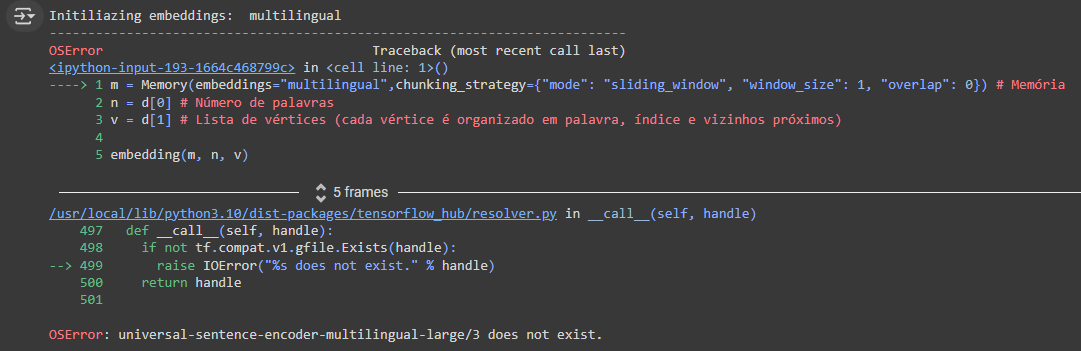

### [Referência](https://vectordb.com/)

## Classe Network

Aqui é utilizado a biblioteca Pyvis para criar uma instância para visualizar redes/grafos de forma interativa.

```
net = Network(notebook=True, cdn_resources='remote', directed=True)
```
* `notebook=True`: Esta opção indica que a visualização da rede será exibida diretamente em um notebook Jupyter.

* `cdn_resources='remote'`: Esta opção especifica que os recursos necessários (como bibliotecas JavaScript e CSS) serão carregados de um Content Delivery Network (CDN) remoto. Isso pode ajudar a reduzir o tempo de carregamento e garantir que seja usado as versões mais recentes desses recursos.

* `directed=True`: Especifica para que o grafo seja direcionado.

### [Referência](https://pyvis.readthedocs.io/en/latest/documentation.html)

## Funções auxiliares

### Cria vértice

In [48]:
def criaVertice(palavra, indice):
  vertice = {
      "palavra": palavra, # Recupera cada palavra e tira o "\n"
      "indice": indice,
      "n_vizinhos": 0,
      "proximos": []
  }
  return vertice

### Lê arquivo

Os dados do documento são importados e guardados na variável `dados`.

In [49]:
def leArquivoHTTP(url):
  arquivo = requests.get(url).text

  lista = arquivo.split() # Distribui cada elemento do arquivo numa lista
  n_palavras = int(lista.pop(0)) # Separa o número de palavras (primeira linha do arquivo)
  vertices = []
  for i in range(n_palavras):
    vertice = criaVertice(lista[i], i)
    vertices.append(vertice)

  dados = [n_palavras]
  dados.append(vertices)

  return dados

In [50]:
def leArquivo(origem):
  try:
    with open(origem, 'r', encoding='utf-8') as arquivo:
      n_palavras = int(arquivo.readline()) # Recupera o número de palavras (primeira linha do arquivo)

      vertices = []
      for i in range(n_palavras):
        vertice = criaVertice(arquivo.readline().strip(), i)
        vertices.append(vertice)

    dados = [n_palavras]
    dados.append(vertices)

    return dados

  except FileNotFoundError:
      print("[Erro: Arquivo não encontrado]")

### Embedding

Cada palavra é convertida para um vetor numérico e guardada na memória.

In [51]:
def embedding(memoria, n_palavras, vertices): # Método para fazer o embedding e inserção na memória de todas as palavras
  for i in range(n_palavras):
    memoria.save(vertices[i]["palavra"])

### Busca vetorial

Quanto menor é a distância, maior é a proximidade semântica.

In [52]:
def buscaVetorial(memoria, palavra): # Método para retornar os quatro elementos com maior proximidade semântica de uma palavra
  busca = memoria.search(palavra, top_n=4)
  return busca

### Busca índice

Busca um índice através da palavra dentro da lista de vértices.

In [53]:
def buscaIndice(n_palavras, vertices, palavra):
  for i in range(n_palavras):
    if(vertices[i]["palavra"] == palavra):
      return vertices[i]["indice"]
  return -1

### Busca palavra

Busca uma palavra através do índice dentro da lista de vértices.

In [54]:
def buscaPalavra(n_palavras, vertices, indice):
  if(indice >= n_palavras or indice < 0):
    return "[Erro: índice inválido]"
  for i in range(n_palavras):
    if(vertices[i]["indice"] == indice):
      return vertices[i]["palavra"]
  return "[Erro: índice não encontrado]"

### Cria vizinho

In [55]:
def criaVizinho(palavra, indice, distancia):
  proximo = {
      "vizinho": palavra,
      "indice": indice,
      "distancia": distancia
  }
  return proximo

### Integra grafo

A palavra mais próxima armazenada na memória é ela mesma, portanto para encontrar as outras três palavras mais próximas foram recuperadas as palavras de índice 1 até 4.

In [56]:
def integraGrafo(memoria, n_palavras, vertices):
  grafo = GrafoR(n_palavras) # Cria um grafo rotulado
  for i in range(n_palavras):
    busca = buscaVetorial(memoria, vertices[i]["palavra"])
    proximos = []
    for j in range(1,4):
      palavra = busca[j]['chunk']
      distancia = busca[j]['distance']
      proximo = criaVizinho(palavra, buscaIndice(n_palavras, vertices, palavra), distancia)
      proximos.append(proximo)
      vertices[i]["n_vizinhos"] += 1
      grafo.insereA(vertices[i]["indice"], proximo["indice"], proximo["distancia"])
    vertices[i]["proximos"] = proximos
  return grafo

### Grava dados

In [57]:
def gravaDados(n_palavras, vertices):
  with open("grafo.txt", "w") as arquivo:
    for i in range(n_palavras):
      palavra = vertices[i]["palavra"]
      arquivo.write(palavra+"\n")

### Insere vértice

In [58]:
def insereVertice(grafo, n_palavras, vertices, palavra):
  if(buscaIndice(n_palavras, vertices, palavra) == -1):
    grafo.insereV()
    vertices.append(criaVertice(palavra, n_palavras))
  else:
    print("[Erro: Palavra já existe]")

### Cria aresta

In [59]:
def criaAresta(origem, destino):
  aresta = [0] * 2
  aresta[0] = origem
  aresta[1] = destino
  return aresta

### Busca vizinho

In [60]:
def buscaVizinho(n_vizinhos, vizinhos, indice):
  for i in range(n_vizinhos):
    if(vizinhos[i]["indice"] == indice):
      return i
  return -1

### Insere aresta

In [61]:
def insereAresta(grafo, n_palavras, vertices, aresta, peso):
  origem = aresta[0]
  destino = aresta[1]
  if(origem >= n_palavras or origem < 0):
    print("[Erro: origem não existe]")

  elif(destino >= n_palavras or destino < 0):
    print("[Erro: destino não existe]")

  else:
    n_vizinhos = vertices[origem]["n_vizinhos"]
    vizinhos = vertices[origem]["proximos"]

    if(buscaVizinho(n_vizinhos, vizinhos, destino) != -1):
      print("[Erro: aresta já existe]")

    else:
      grafo.insereA(origem, destino, peso)
      palavra_destino = buscaPalavra(n_palavras, vertices, destino)
      vertices[origem]["proximos"].append(criaVizinho(palavra_destino, destino, peso))
      vertices[origem]["n_vizinhos"] += 1

### Remove aresta

In [62]:
def removeAresta(grafo, n_palavras, vertices, aresta):
  origem = aresta[0]
  destino = aresta[1]
  if(origem >= n_palavras or origem < 0):
    print("[Erro: origem não existe]")

  elif(destino >= n_palavras or destino < 0):
    print("[Erro: destino não existe]")

  else:
    n_vizinhos = vertices[origem]["n_vizinhos"]
    vizinhos = vertices[origem]["proximos"]
    posicao = buscaVizinho(n_vizinhos, vizinhos, destino)
    if(posicao == -1):
      print("[Erro: aresta não existe]")

    else:
      grafo.removeA(origem, destino)
      vertices[origem]["proximos"].pop(posicao)
      vertices[origem]["n_vizinhos"] -= 1

### Remove vértice

In [63]:
def removeVertice(grafo, n_palavras, vertices, removido):
  if(removido >= n_palavras or removido < 0):
    print("[Erro: vértice não existe]")
  else:
    grafo.removeV(removido)
    for i in range(n_palavras - 1):
      if(i >= removido):
        vertices[i] = vertices[i+1]
        vertices[i]["indice"] = i

      n_vizinhos = vertices[i]["n_vizinhos"]
      vizinhos = vertices[i]["proximos"]
      posicao = buscaVizinho(n_vizinhos, vizinhos, removido)

      if(posicao != -1):
        aresta = criaAresta(vertices[i]["indice"], removido)
        removeAresta(grafo, n_palavras, vertices, aresta)

    vertices.pop()

### Imprime vértices

In [64]:
def imprimeVertices(network, n_palavras, vertices):
  for i in range(n_palavras):
    network.add_node( # Adiciona vértices
        i, # Índice
        label=vertices[i]["palavra"], # Descrição do vértice
        color="yellow"
    )

### Imprime arestas

In [65]:
def imprimeArestas(network, n_palavras, vertices):
  for i in range(n_palavras):
    vizinhos = vertices[i]["proximos"]
    for j in range(vertices[i]["n_vizinhos"]):
      distancia = float(vizinhos[j]["distancia"])
      if(distancia > 0 and distancia < 1):
        peso = (1-distancia) # Caso seja um valor entre a escala da distância semântica
      else:
        peso = distancia # Caso seja um valor fora do limite
      network.add_edge( # Adiciona as arestas
          vertices[i]["indice"], # Origem
          vizinhos[j]["indice"], # Destino
          value=peso, # Peso
          title=f'''
          Origem: {vertices[i]["palavra"]}
          Destino: {vizinhos[j]["vizinho"]}
          Peso: {peso:.2f}
                        ''', # Descrição
          color="red"
      )

### Imprime grafo

In [66]:
def imprimeGrafo(n_palavras, vertices):
  net = Network(notebook=True, cdn_resources='remote', directed=True, height="1200px", width="100%", bgcolor="black", font_color="white")
  imprimeVertices(net, n_palavras, vertices)
  imprimeArestas(net, n_palavras, vertices)
  net.barnes_hut() # Dispersa melhor os vértices
  net.show("grafo.html") # Salva o grafo

### Mostra vértice

In [67]:
def mostraVertice(vertices, indice):
  palavra = vertices[indice]["palavra"]
  n_vizinhos = vertices[indice]["n_vizinhos"]
  vizinhos = vertices[indice]["proximos"]
  print(f"\nPalavra: {palavra}\n")
  for i in range(n_vizinhos):
    vizinho =  vizinhos[i]["vizinho"]
    distancia = vizinhos[i]["distancia"]
    print(f'''
    Vizinho: {vizinho}
    Distância: {distancia}''')

# Testes

## 1. Ler dados (Feito)

In [68]:
d = leArquivoHTTP('https://raw.githubusercontent.com/Cehiim/TeoriaDosGrafos/refs/heads/main/Projeto/teste.txt')
#d = leArquivo("palavras.txt")
print(d)

[8, [{'palavra': 'Ecossistema', 'indice': 0, 'n_vizinhos': 0, 'proximos': []}, {'palavra': 'Sustentabilidade', 'indice': 1, 'n_vizinhos': 0, 'proximos': []}, {'palavra': 'Biodiversidade', 'indice': 2, 'n_vizinhos': 0, 'proximos': []}, {'palavra': 'Reciclagem', 'indice': 3, 'n_vizinhos': 0, 'proximos': []}, {'palavra': 'Conservação', 'indice': 4, 'n_vizinhos': 0, 'proximos': []}, {'palavra': 'Poluição', 'indice': 5, 'n_vizinhos': 0, 'proximos': []}, {'palavra': 'Desmatamento', 'indice': 6, 'n_vizinhos': 0, 'proximos': []}, {'palavra': 'Reflorestamento', 'indice': 7, 'n_vizinhos': 0, 'proximos': []}]]


A palavra mais próxima armazenada na memória é ela mesma, portanto para encontrar as outras três palavras mais próximas foram recuperadas as palavras de índice 1 até 4.

In [69]:
m = Memory(chunking_strategy={"mode": "sliding_window", "window_size": 1, "overlap": 0}) # Memória
n = d[0] # Número de palavras
v = d[1] # Lista de vértices (cada vértice é organizado em palavra, índice e vizinhos próximos)

embedding(m, n, v)

for i in range(n):
  p = v[i]["palavra"]
  b = buscaVetorial(m, p)
  print(f"\n\nBusca: {p}\n")
  for i in range(1,4):
    palavra = b[i]['chunk']
    distancia = b[i]['distance']
    print(f"Palavra: {palavra}\nDistância: {distancia:.2f}\n")

Initiliazing embeddings:  normal
OK.


Busca: Ecossistema

Palavra: Biodiversidade
Distância: 0.58

Palavra: Sustentabilidade
Distância: 0.59

Palavra: Reflorestamento
Distância: 0.73



Busca: Sustentabilidade

Palavra: Biodiversidade
Distância: 0.45

Palavra: Ecossistema
Distância: 0.59

Palavra: Reflorestamento
Distância: 0.69



Busca: Biodiversidade

Palavra: Sustentabilidade
Distância: 0.45

Palavra: Ecossistema
Distância: 0.58

Palavra: Poluição
Distância: 0.68



Busca: Reciclagem

Palavra: Reflorestamento
Distância: 0.64

Palavra: Poluição
Distância: 0.78

Palavra: Ecossistema
Distância: 0.80



Busca: Conservação

Palavra: Poluição
Distância: 0.78

Palavra: Sustentabilidade
Distância: 0.78

Palavra: Desmatamento
Distância: 0.86



Busca: Poluição

Palavra: Reflorestamento
Distância: 0.65

Palavra: Biodiversidade
Distância: 0.68

Palavra: Desmatamento
Distância: 0.72



Busca: Desmatamento

Palavra: Reflorestamento
Distância: 0.69

Palavra: Poluição
Distância: 0.72

Palavra: B

In [70]:
g = integraGrafo(m, n, v)
print(v[0]) # Informações do primeiro elemento da lista de vértices
g.showMin()

{'palavra': 'Ecossistema', 'indice': 0, 'n_vizinhos': 3, 'proximos': [{'vizinho': 'Biodiversidade', 'indice': 2, 'distancia': 0.5811522}, {'vizinho': 'Sustentabilidade', 'indice': 1, 'distancia': 0.59003323}, {'vizinho': 'Reflorestamento', 'indice': 7, 'distancia': 0.7258596}]}

 n:  8 m: 24

 0.00  0.59  0.58  0.00  0.00  0.00  0.00  0.73 

 0.59  0.00  0.45  0.00  0.00  0.00  0.00  0.69 

 0.58  0.45  0.00  0.00  0.00  0.68  0.00  0.00 

 0.80  0.00  0.00  0.00  0.00  0.78  0.00  0.64 

 0.00  0.78  0.00  0.00  0.00  0.78  0.86  0.00 

 0.00  0.00  0.68  0.00  0.00  0.00  0.72  0.65 

 0.00  0.00  0.79  0.00  0.00  0.72  0.00  0.69 

 0.00  0.00  0.00  0.64  0.00  0.65  0.69  0.00 


fim da impressao do grafo.


## 2. Gravar dados (Feito)

In [71]:
gravaDados(n,v)

No Google Colab o arquivo nomeado como `grafo.txt` poderá ser acessado nos arquivos localizado no canto esquerdo.

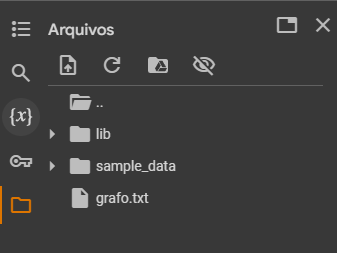

## 3. Inserir vértice (Feito)

In [72]:
insereVertice(g, n, v, "Maritaca")
n += 1
print(n)
print(v)
g.showMin()

9
[{'palavra': 'Ecossistema', 'indice': 0, 'n_vizinhos': 3, 'proximos': [{'vizinho': 'Biodiversidade', 'indice': 2, 'distancia': 0.5811522}, {'vizinho': 'Sustentabilidade', 'indice': 1, 'distancia': 0.59003323}, {'vizinho': 'Reflorestamento', 'indice': 7, 'distancia': 0.7258596}]}, {'palavra': 'Sustentabilidade', 'indice': 1, 'n_vizinhos': 3, 'proximos': [{'vizinho': 'Biodiversidade', 'indice': 2, 'distancia': 0.44970125}, {'vizinho': 'Ecossistema', 'indice': 0, 'distancia': 0.59003323}, {'vizinho': 'Reflorestamento', 'indice': 7, 'distancia': 0.692708}]}, {'palavra': 'Biodiversidade', 'indice': 2, 'n_vizinhos': 3, 'proximos': [{'vizinho': 'Sustentabilidade', 'indice': 1, 'distancia': 0.44970125}, {'vizinho': 'Ecossistema', 'indice': 0, 'distancia': 0.5811522}, {'vizinho': 'Poluição', 'indice': 5, 'distancia': 0.6769276}]}, {'palavra': 'Reciclagem', 'indice': 3, 'n_vizinhos': 3, 'proximos': [{'vizinho': 'Reflorestamento', 'indice': 7, 'distancia': 0.63607174}, {'vizinho': 'Poluição', '

## 4. Inserir aresta (Feito)

In [73]:
a = criaAresta(8, 4)
a2 = criaAresta(8, 0)
insereAresta(g, n, v, a, 0.8)
print(v[8])
insereAresta(g, n, v, a, 0.8)
insereAresta(g, n, v, a2, 0.4)
print(v[8])
g.showMin()

{'palavra': 'Maritaca', 'indice': 8, 'n_vizinhos': 1, 'proximos': [{'vizinho': 'Conservação', 'indice': 4, 'distancia': 0.8}]}
[Erro: aresta já existe]
{'palavra': 'Maritaca', 'indice': 8, 'n_vizinhos': 2, 'proximos': [{'vizinho': 'Conservação', 'indice': 4, 'distancia': 0.8}, {'vizinho': 'Ecossistema', 'indice': 0, 'distancia': 0.4}]}

 n:  9 m: 26

 0.00  0.59  0.58  0.00  0.00  0.00  0.00  0.73  0.00 

 0.59  0.00  0.45  0.00  0.00  0.00  0.00  0.69  0.00 

 0.58  0.45  0.00  0.00  0.00  0.68  0.00  0.00  0.00 

 0.80  0.00  0.00  0.00  0.00  0.78  0.00  0.64  0.00 

 0.00  0.78  0.00  0.00  0.00  0.78  0.86  0.00  0.00 

 0.00  0.00  0.68  0.00  0.00  0.00  0.72  0.65  0.00 

 0.00  0.00  0.79  0.00  0.00  0.72  0.00  0.69  0.00 

 0.00  0.00  0.00  0.64  0.00  0.65  0.69  0.00  0.00 

 0.40  0.00  0.00  0.00  0.80  0.00  0.00  0.00  0.00 


fim da impressao do grafo.


## 5. Remover vértice (Feito)

In [74]:
removeVertice(g, n, v, 8)
n -= 1
print(n)
print(v)
g.showMin()

8
[{'palavra': 'Ecossistema', 'indice': 0, 'n_vizinhos': 3, 'proximos': [{'vizinho': 'Biodiversidade', 'indice': 2, 'distancia': 0.5811522}, {'vizinho': 'Sustentabilidade', 'indice': 1, 'distancia': 0.59003323}, {'vizinho': 'Reflorestamento', 'indice': 7, 'distancia': 0.7258596}]}, {'palavra': 'Sustentabilidade', 'indice': 1, 'n_vizinhos': 3, 'proximos': [{'vizinho': 'Biodiversidade', 'indice': 2, 'distancia': 0.44970125}, {'vizinho': 'Ecossistema', 'indice': 0, 'distancia': 0.59003323}, {'vizinho': 'Reflorestamento', 'indice': 7, 'distancia': 0.692708}]}, {'palavra': 'Biodiversidade', 'indice': 2, 'n_vizinhos': 3, 'proximos': [{'vizinho': 'Sustentabilidade', 'indice': 1, 'distancia': 0.44970125}, {'vizinho': 'Ecossistema', 'indice': 0, 'distancia': 0.5811522}, {'vizinho': 'Poluição', 'indice': 5, 'distancia': 0.6769276}]}, {'palavra': 'Reciclagem', 'indice': 3, 'n_vizinhos': 3, 'proximos': [{'vizinho': 'Reflorestamento', 'indice': 7, 'distancia': 0.63607174}, {'vizinho': 'Poluição', '

## 6. Remover aresta (Feito)

In [75]:
a3 = criaAresta(0,7)
removeAresta(g,n,v,a3)
print(v[0])
g.showMin()

{'palavra': 'Ecossistema', 'indice': 0, 'n_vizinhos': 2, 'proximos': [{'vizinho': 'Biodiversidade', 'indice': 2, 'distancia': 0.5811522}, {'vizinho': 'Sustentabilidade', 'indice': 1, 'distancia': 0.59003323}]}

 n:  8 m: 23

 0.00  0.59  0.58  0.00  0.00  0.00  0.00  0.00 

 0.59  0.00  0.45  0.00  0.00  0.00  0.00  0.69 

 0.58  0.45  0.00  0.00  0.00  0.68  0.00  0.00 

 0.80  0.00  0.00  0.00  0.00  0.78  0.00  0.64 

 0.00  0.78  0.00  0.00  0.00  0.78  0.86  0.00 

 0.00  0.00  0.68  0.00  0.00  0.00  0.72  0.65 

 0.00  0.00  0.79  0.00  0.00  0.72  0.00  0.69 

 0.00  0.00  0.00  0.64  0.00  0.65  0.69  0.00 


fim da impressao do grafo.


## 7. Exibir grafo (Feito)

É feito o *download* de um arquivo HTML com a representação do grafo.

In [76]:
print(f"Grafo direcionado com {g.n} vértices e {g.m} arestas")
imprimeGrafo(n,v)

Grafo direcionado com 8 vértices e 23 arestas
grafo.html


No Google Colab o arquivo nomeado como `grafo.html` poderá ser acessado nos arquivos localizado no canto esquerdo.

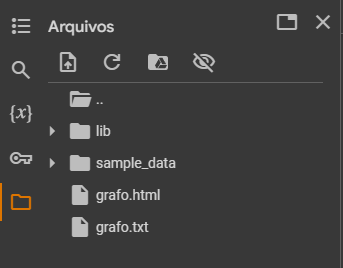

* As arestas mais grossas e com cores mais fortes têm peso maior.

* Clique na aresta para mostrar o seu peso.

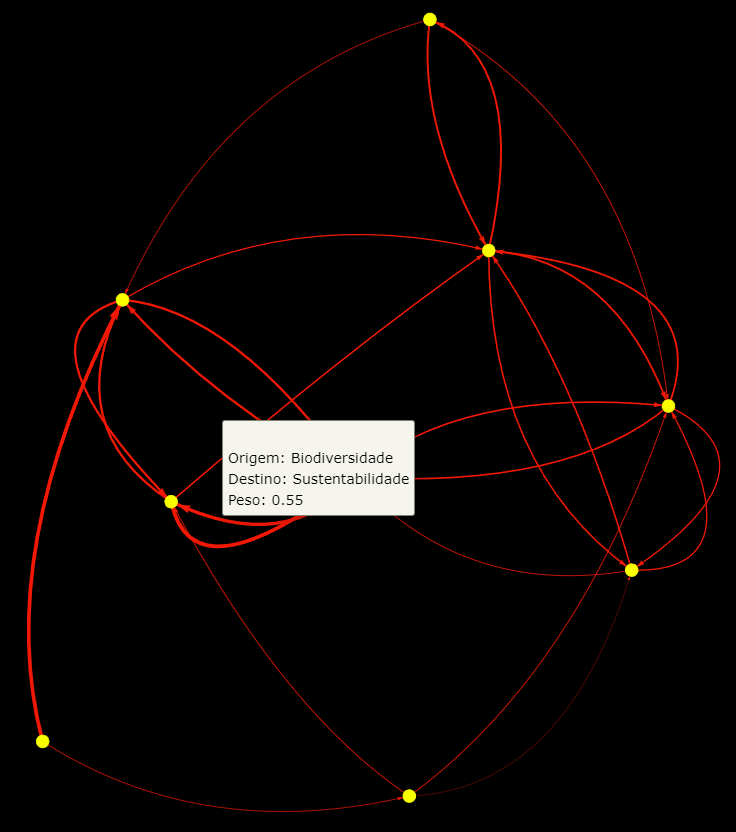

## 8. Exibir matriz (Feito)

In [77]:
g.showMin()


 n:  8 m: 23

 0.00  0.59  0.58  0.00  0.00  0.00  0.00  0.00 

 0.59  0.00  0.45  0.00  0.00  0.00  0.00  0.69 

 0.58  0.45  0.00  0.00  0.00  0.68  0.00  0.00 

 0.80  0.00  0.00  0.00  0.00  0.78  0.00  0.64 

 0.00  0.78  0.00  0.00  0.00  0.78  0.86  0.00 

 0.00  0.00  0.68  0.00  0.00  0.00  0.72  0.65 

 0.00  0.00  0.79  0.00  0.00  0.72  0.00  0.69 

 0.00  0.00  0.00  0.64  0.00  0.65  0.69  0.00 


fim da impressao do grafo.


## 9. Apresentar conexidade do grafo e o reduzido (Feito)

In [78]:
gd = Grafo(4) # Grafo desconexo
gd.insereA(0,1)
gd.insereA(1,0)
gd.insereA(2,3)
gd.showMin()
gd.conexidade()


 n:  4 m:  3

 0  1  0  0 

 1  0  0  0 

 0  0  0  1 

 0  0  0  0 


fim da impressao do grafo.
O grafo é desconexo (C0)


In [79]:
gs = Grafo(4) # Grafo simplesmente conexo
gs.insereA(0,1)
gs.insereA(0,2)
gs.insereA(1,3)
gs.insereA(2,3)
gs.showMin()
gs.conexidade()


 n:  4 m:  4

 0  1  1  0 

 0  0  0  1 

 0  0  0  1 

 0  0  0  0 


fim da impressao do grafo.
O grafo é simplesmente conexo (C1)


In [80]:
gsf = Grafo(4) # Grafo semi-fortemente conexo
gsf.insereA(0,1)
gsf.insereA(1,2)
gsf.insereA(2,3)
gsf.showMin()
gsf.conexidade()


 n:  4 m:  3

 0  1  0  0 

 0  0  1  0 

 0  0  0  1 

 0  0  0  0 


fim da impressao do grafo.
O grafo é semi-fortemente conexo (C2)


In [81]:
gf = Grafo(4) # Grafo fortemente conexo
gf.insereA(0,1)
gf.insereA(1,2)
gf.insereA(2,3)
gf.insereA(3,0)
gf.showMin()
gf.conexidade()


 n:  4 m:  4

 0  1  0  0 

 0  0  1  0 

 0  0  0  1 

 1  0  0  0 


fim da impressao do grafo.
O grafo é fortemente conexo (C3)


In [83]:
gsf.showMin()
gsf.grafoReduzido()


 n:  4 m:  3

 0  1  0  0 

 0  0  1  0 

 0  0  0  1 

 0  0  0  0 


fim da impressao do grafo.
particao [0, 1, 2, 3]
[0, 1, 2, 3]
